<a href="https://colab.research.google.com/github/hhbb123/hoon/blob/master/condensed%20matter/f_0_BoseHubbardmodel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import math
import pylab as plt

In [14]:
#parameter
q_init=1  #<b>=q
d=2
n_max=6

t_max=0.05
t_min=0
u_max=1.5

In [15]:
n=np.zeros((n_max,n_max))
for i in range(0,n_max):
    n[i][i]=i

# b dagger=bt
bt=np.zeros((n_max,n_max))
for i in range(0,n_max):
    bt[i][i-1]=i**(0.5)
b=np.matrix.getH(bt)

def Hamiltonian(t,u,q):
  H=-2*d*t*(bt*q+b*q)-u*n+0.5*n*(n-1)
  return H
print(Hamiltonian(1,1,1))

[[-0.         -4.         -0.         -0.         -0.         -0.        ]
 [-4.         -1.         -5.65685425 -0.         -0.         -0.        ]
 [-0.         -5.65685425 -1.         -6.92820323 -0.         -0.        ]
 [-0.         -0.         -6.92820323  0.         -8.         -0.        ]
 [-0.         -0.         -0.         -8.          2.         -8.94427191]
 [-0.         -0.         -0.         -0.         -8.94427191  5.        ]]


In [28]:
T=[]
Q=[]
u_max=1.5
t_max=0.1
for t in np.arange(0,t_max,t_max/100):
  q=1
  q_prev=100000000
  #for k in range(0,20):
  while abs(q_prev-q)>1e-4:
    D,V=np.linalg.eig(Hamiltonian(t,0.5,q))
    q_prev=q
    w=V[:,np.argmin(D)]

    q= np.dot(np.dot(w,b),np.matrix.getH(w))
  Q.append(q)
  T.append(t)

[0.0, 3.316698260619247e-07, 2.544777461620145e-07, 1.929342250826653e-06, 8.111941983204752e-06, 2.9620618024049153e-06, 8.813171187978857e-06, 3.717758272337131e-06, 9.420776599815002e-06, 2.1365493478813385e-05, 1.0653057388253947e-05, 2.2674810142572893e-05, 1.299698095922489e-05, 2.6482395349148535e-05, 1.7173494328421593e-05, 3.3885905089849325e-05, 2.4534407229878216e-05, 4.721941293733501e-05, 3.775328185876261e-05, 7.121228623608046e-05, 6.229360966717821e-05, 5.822791444938244e-05, 0.00010969747611602013, 0.00011066136555665931, 0.00011818632546978481, 0.00013320301148040927, 0.00015796198626543063, 0.0001273696213835599, 0.00017202005549579806, 0.00016860224315667135, 0.0002555238450732547, 0.00022225389578081205, 0.0002956600455685316, 0.0003412276830252565, 0.0003717135734702552, 0.0004923075130048056, 0.0005852605564716067, 0.0007272317763611727, 0.0009915912790402636, 0.001395987495759316, 0.002352867654487298, 0.006125777309787932, 0.125072912719215, 0.23638519333822805

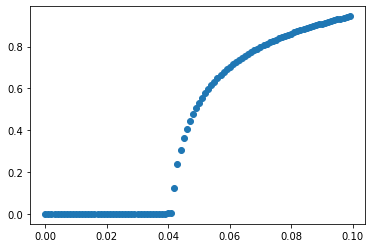

In [29]:
print(Q)
plt.scatter(T,Q)
plt.show()